In [1]:
# Importing Packages
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:
# Breadth-first Search Algorithm
from collections import deque

def search(name, find):
    search_queue = deque()
    search_queue += graph[name]
    # This array is how you keep track of which people you've searched before.
    searched = []
    while search_queue:
        person = search_queue.popleft()
        # Only search this person if you haven't already searched them.
        if person not in searched:
            if person == find:
                return True
            else:
                search_queue += graph[person]
                # Marks this person as searched
                searched.append(person)
    return False

### 1) Create a five level 'connections' graph (all unique, no duplicates)

- The first level should have five people and each person in first level should have five connections (they can be exclusive to one person or shared with other members on the same level, but all five should be unique, no duplicates)

- Each person in the second level should have five connections (they can be exclusive to one person or shared with other members on the same level, but all five should be unique, no duplicates)

- Continue the same for third, fourth, and fifth levels

- There should be no reverse connections (i.e. first level can connect to second level but second cannot have any reverse connection with the first, and so on for 3rd, 4th, and 5th levels)

In [3]:
#Creating Graph
graph = {}

#Level 1
graph['A'] = ['B','C','D','E','F']
graph['B'] = ['A','C','D','E','G']
graph['C'] = ['A','B','D','E','H']
graph['D'] = ['A','B','C','E','I']
graph['E'] = ['A','B','C','D','J']

#Level 2
graph['F'] = ['G','H','I','J','K']
graph['G'] = ['H','I','J','F','L']
graph['H'] = ['F','G','I','J','M']
graph['I'] = ['F','G','H','J','N']
graph['J'] = ['F','G','H','I','O']

#Level 3
graph['K'] = ['L','M','N','O','P']
graph['L'] = ['K','M','N','O','Q']
graph['M'] = ['K','L','N','O','R']
graph['N'] = ['K','L','M','O','S']
graph['O'] = ['K','L','M','N','T']

#Level 4
graph['P'] = ['Q','R','S','T','U']
graph['Q'] = ['R','S','T','P','V']
graph['R'] = ['P','Q','S','T','W']
graph['S'] = ['P','Q','R','T','X']
graph['T'] = ['P','Q','R','X','Y']

#Level 5
graph['U'] = ['V','W','X','Y','Z']
graph['V'] = ['W','X','Y','U','Z']
graph['W'] = ['X','Y','U','V','Z']
graph['X'] = ['Y','U','V','W','Z']
graph['Y'] = ['V','W','X','U','Z']

### 2) Now search for three people on each level and capture the time for each search.

In [4]:
# Searching level 1 of network
level_1 = []
for i in range(100):
    start = time.time()
    search('A', 'A')
    end = time.time()
    level_1.append((end - start) * 1000)
    
level1_time = np.mean(level_1)


# Searching level 2 of network
level_2 = []

for i in range(100):
    start = time.time()
    search('A', 'F')
    search('F', 'J')
    end = time.time()
    level_2.append((end - start) * 1000)
    
level2_time = np.mean(level_2)

# Searching level 3 of network

level_3 = []

for i in range(100):
    start = time.time()
    search('A', 'F')
    search('F', 'J')
    search('M', 'N')
    end = time.time()
    level_3.append((end - start) * 1000)
    
level3_time = np.mean(level_3)


# Searching level 4 of network

level_4 = []

for i in range(100):
    start = time.time()
    search('A', 'F')
    search('F', 'J')
    search('M', 'N')
    search('S', 'T')
    end = time.time()
    level_4.append((end - start) * 1000)
    
level4_time = np.mean(level_4)

# Searching level 5 of network

level_5 = []

for i in range(100):
    start = time.time()
    search('A', 'F')
    search('F', 'J')
    search('M', 'N')
    search('S', 'T')
    search('Y', 'Z')
    end = time.time()
    level_5.append((end - start) * 1000)
    
level5_time = np.mean(level_5)

### 3) Organize the results of the study into an table showing the 'name' that you searched for, the level of the search (first, second, third, fourth, fifth), and the time it took.  Discuss any findings.

In [5]:
# Results table
persons = ['A', 'F, J', 'F, J, N', 'F, J, N, T',
        'F, J, N, T, Z']

network = ['First', 'Second', 'Third', 'Fourth', 'Fifth']

search_time = [level1_time, level2_time, level3_time, level4_time, level5_time]

table = pd.DataFrame(list(zip(network, persons, search_time)),
              columns=['Level', 'Persons Searched', 'Execution Time'])
table

,Level,Persons Searched,Execution Time
0,First,A,0.001953
1,Second,"F, J",0.002127
2,Third,"F, J, N",0.002952
3,Fourth,"F, J, N, T",0.003824
4,Fifth,"F, J, N, T, Z",0.004890


### Discussion: 
#### As the algorithm searches the nodes and edges, it progresses to the second, third, fourth, and fifth levels of the network. This results in increased search times as the algorithm processes by order of first in, first out. Once, a person has been searched, they are marked as searched and the search moves onto the next person in the network. 

### 4) Using the average time for each level, create a plot and compare times at each level (five bars or any other suitable visual).  Discuss any findings.

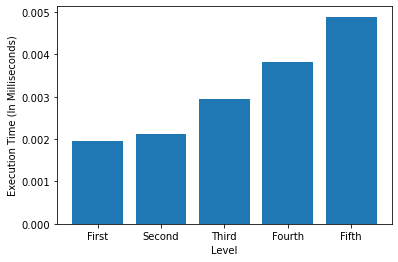

In [6]:
# Visualization of Results

y_pos = np.arange(len(persons))
plt.bar(y_pos, search_time)
plt.xticks(y_pos, network)
plt.xlabel('Level')
plt.ylabel('Execution Time (In Milliseconds)')
plt.show()

# EXECUTIVE SUMMARY

### Introduction

This report analyzed the speed of the Breadth-first Search algorithm by executing a search on a network composed of five levels with five connections formed from five persons. A set of twenty-five names were created with each name being a node in the network, and each relationship being an vertice.

### Breadth-first Search Algorithm

The Breadth-first Search algorithm allows for the shortest distance between two objects to be computed. The algorithm works by searching a graph which represents a network. The network models a set of connections. This is stated as the network is composed of objects which are nodes, and of connections which are vertices. The Breadth-first Search algorithm searches the network by examining the network's nodes and vertices. The search is a function of two parameters. Is there a path from node A to node B? What is the shortest distance between node A and node B?

### Industry Application

The Breadth-first Search algorithm is a commonly implemented solution in various applications. It can be used to find the shortest route during a trip, for instance, in GPS technology. It can also be used to find a value within a network. This would be in the form of a query within a social media network. The argument within a defined function would provide the parameters for determining a vertice's value within a network. The algorithm can be also used in artificial intelligence applications to determine strategic value of autonomous decision-making. Supply-chain networks make use of the algorithm to analyze shipping costs and finding the optimal transporation route for products.   

### Methodology

A population sample of twenty-five generated names were used to select a sample of six names across five levels of a network. For each person, the execution time of the Breadth-first Search algorithm was appended to five lists created to store the values for execution time.

### Analysis & Results

The results displayed on table 1 show the execution time for the Breadth-first Search algorithm to be 0.001662 milliseconds when searching for one person on level one. On the second level of the network, the execution time for a search of two persons was 0.002236 milliseconds. The time increased through iterations on levels three, four, and five. At the level five, the execution time for a search of five persons was 0.005252 milliseconds. 

### Discussion of Big O Notation

Big O notation for the Breadth-first Search algorithm is O(n+e), where n is equal to the number of nodes and e is equal to the number of edges. Since the algorithm searches every node in a network, the notation is O(number of nodes + number of edges). 

### Conclusion

The execution speed of a Breadth-first Search algorithm in Big O notation is given as O(n+e). This makes it great for searching nodes and their relationships within a network composed of a few nodes or billions of nodes. It makes it a great algorithm to implement queries in graph databases or in organizational operations which rely on graph theory.  